In [1]:
import pandas as pd
import numpy as np
import datetime
import csv

In [44]:
new_data = pd.read_csv('data/eth_price.csv')

hourly_data = new_data.copy()
data_info = pd.to_datetime(hourly_data['date_info'],unit='s')
hourly_data = hourly_data.drop(columns='date_info')
hourly_data.reset_index(inplace=True)
hourly_data.set_index(data_info,inplace=True)

hourly_data.drop(columns='index',inplace=True)
open_hourly = hourly_data.copy().drop(columns='close')

Text(0.5, 0, 'Date')

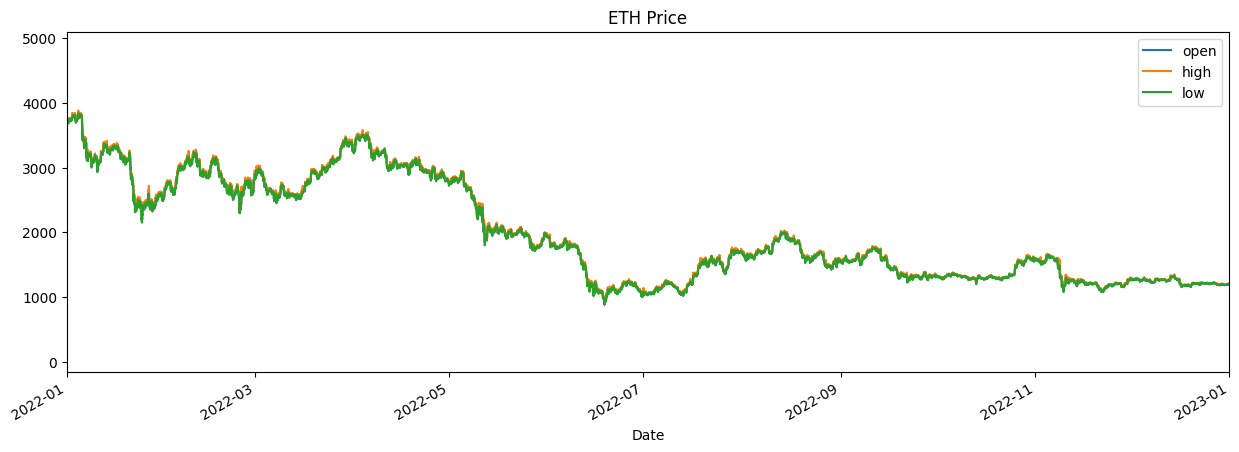

In [4]:
ax = open_hourly.plot(figsize=(15,5),title= 'ETH Price')
ax.set_xlim(left=datetime.date(year=2022,month=1,day=1),right=datetime.date(year=2023,month=1,day=1))
ax.set_xlabel('Date')

In [45]:
hourly_shape = open_hourly.shape[0]
percentage_change_hourly = np.arange(start=0,stop=1,step=0.001)
shp_hourly = percentage_change_hourly.shape
 

h_o_hourly = np.zeros(shape=shp_hourly)
l_o_hourly = np.zeros(shape=shp_hourly)
open_hourly['High/Open'] = (open_hourly['high']/open_hourly['open']-1)
open_hourly['Low/Open'] = (open_hourly['low']/open_hourly['open']-1)
for changes_percentage in range(len(percentage_change_hourly)):
    h_o_hourly[changes_percentage] = np.sum(open_hourly['High/Open']>=percentage_change_hourly[changes_percentage])/hourly_shape # between 0 and 1 : type = chance
    l_o_hourly[changes_percentage] = np.sum(open_hourly['Low/Open']<=(percentage_change_hourly[changes_percentage])*-1)/hourly_shape # between 0 and 1 : type = chance
    


(0.0, 0.1)

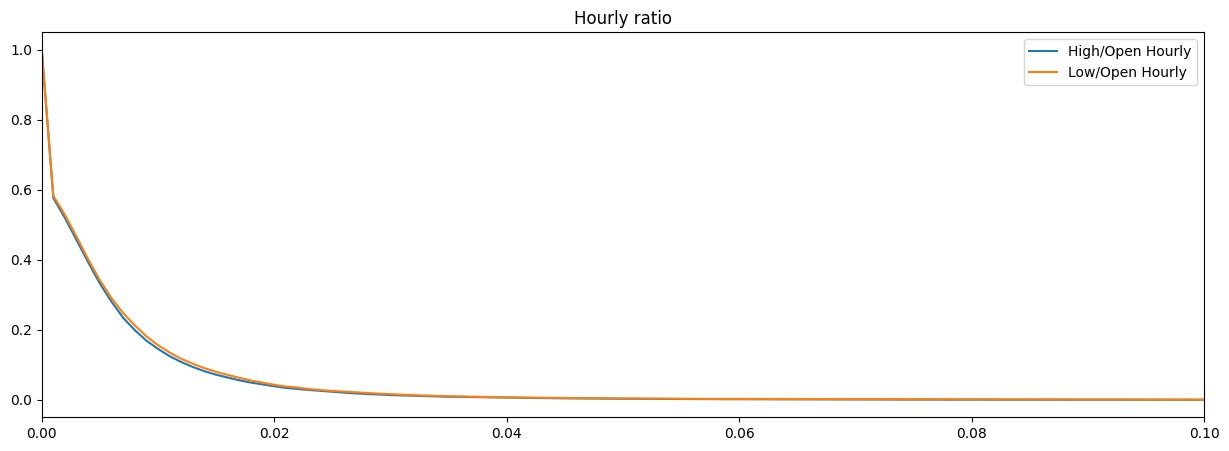

In [46]:
hourly_df = pd.DataFrame(data = [h_o_hourly,l_o_hourly]).transpose()
hourly_df.columns = ['High/Open Hourly','Low/Open Hourly']
hourly_df.index = percentage_change_hourly

ax = hourly_df.plot(title='Hourly ratio',figsize=(15,5))
ax.set_xlim(left= 0 , right= 0.1)

In [47]:

open_hourly.shape[0]/24

1404.5

In [48]:
open_hourly  = open_hourly.loc['2019-04-26 09:30:00':]

In [49]:
days_number = int(open_hourly.shape[0]/24)

In [50]:
open_hourly.drop(columns=['High/Open','Low/Open'],inplace=True)

In [51]:
all_days=[]

for day in range(days_number):
    all_days.append(open_hourly[day*24:(day+1)*24])

for day in range(len(all_days)):
    all_days[day]['low / 1st open'] = 100*(all_days[day]['low']/all_days[day].iloc[-1]['open']-1)
    all_days[day]['high / 1st open'] = 100*(all_days[day]['high']/all_days[day].iloc[-1]['open']-1)
    

C:\Users\Mahsa-PC\AppData\Local\Temp\ipykernel_13832\3034112284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_days[day]['low / 1st open'] = 100*(all_days[day]['low']/all_days[day].iloc[-1]['open']-1)
C:\Users\Mahsa-PC\AppData\Local\Temp\ipykernel_13832\3034112284.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_days[day]['high / 1st open'] = 100*(all_days[day]['high']/all_days[day].iloc[-1]['open']-1)
C:\Users\Mahsa-PC\AppData\Local\Temp\ipykernel_13832\3034112284.py:7: SettingWithCopyWarni

In [53]:
analyse = {}

changes_percentage_daily = np.arange(start=0.1,stop=20.1,step=0.1)
# data = np.zeros(shape=(40000,3))
for win in range(200):
    for lose in range(200):
        analyse[(changes_percentage_daily[win],changes_percentage_daily[lose])]={'win':0,'nothing':0,'lose':0}
# for day in range(all_days):
wins=0
loses=0
nothing=0
temp_list=[]
for win in range(200):
    
        for lose in range(200):

            wins=loses=nothing=0 
            for day in range(len(all_days)):
                
                for hour in range(24):
                    if all_days[day].iloc[hour*-1-1]['high / 1st open']>=  changes_percentage_daily[win]: 
                        wins +=1
                        break
                    elif all_days[day].iloc[hour*-1-1]['low / 1st open']*-1>=  changes_percentage_daily[lose]:                   
                        loses+=1
                        break
                    
                    else :
                        nothing+=1
                        break
            print(f'wins: {changes_percentage_daily [win]} = {wins}',f'lose: {changes_percentage_daily[lose]*-1} = {loses}',f'nothing: {nothing} = nothing')
            with open(file='data/eth-price-hourly-resolution-win.csv',mode='a',newline='') as f:
                writer = csv.writer(f)
                line=[str(changes_percentage_daily [win]),str(-1*changes_percentage_daily [lose]),str(wins),str(loses),str(nothing)]
                writer.writerow(line)
            if  loses == 0:
                break 
        if wins == 0:
            break
           










wins: 0.1 = 845 lose: -0.1 = 226 nothing: 333 = nothing
wins: 0.1 = 845 lose: -0.2 = 218 nothing: 341 = nothing
wins: 0.1 = 845 lose: -0.30000000000000004 = 206 nothing: 353 = nothing
wins: 0.1 = 845 lose: -0.4 = 186 nothing: 373 = nothing
wins: 0.1 = 845 lose: -0.5 = 159 nothing: 400 = nothing
wins: 0.1 = 845 lose: -0.6 = 130 nothing: 429 = nothing
wins: 0.1 = 845 lose: -0.7000000000000001 = 112 nothing: 447 = nothing
wins: 0.1 = 845 lose: -0.8 = 101 nothing: 458 = nothing
wins: 0.1 = 845 lose: -0.9 = 87 nothing: 472 = nothing
wins: 0.1 = 845 lose: -1.0 = 75 nothing: 484 = nothing
wins: 0.1 = 845 lose: -1.1 = 67 nothing: 492 = nothing
wins: 0.1 = 845 lose: -1.2000000000000002 = 60 nothing: 499 = nothing
wins: 0.1 = 845 lose: -1.3000000000000003 = 52 nothing: 507 = nothing
wins: 0.1 = 845 lose: -1.4000000000000001 = 46 nothing: 513 = nothing
wins: 0.1 = 845 lose: -1.5000000000000002 = 43 nothing: 516 = nothing
wins: 0.1 = 845 lose: -1.6 = 39 nothing: 520 = nothing
wins: 0.1 = 845 lose:

In [41]:


# df = pd.read_csv(filepath_or_buffer='data/eth-price-hourly-resolution.csv')

In [54]:
def Finding_Benefits(df=pd.DataFrame()):
    samples = df.index.shape[0]
    benefits = np.zeros(samples)
    for sample in range(samples):
        benefits[sample] = ((df['win percent'].iloc[sample]) *(df['wins'].iloc[sample])/1404 \
                           + (df['lose percent'].iloc[sample]) * (df['loses'].iloc[sample])/1404)
    
    return benefits

(300.0, 600.0)

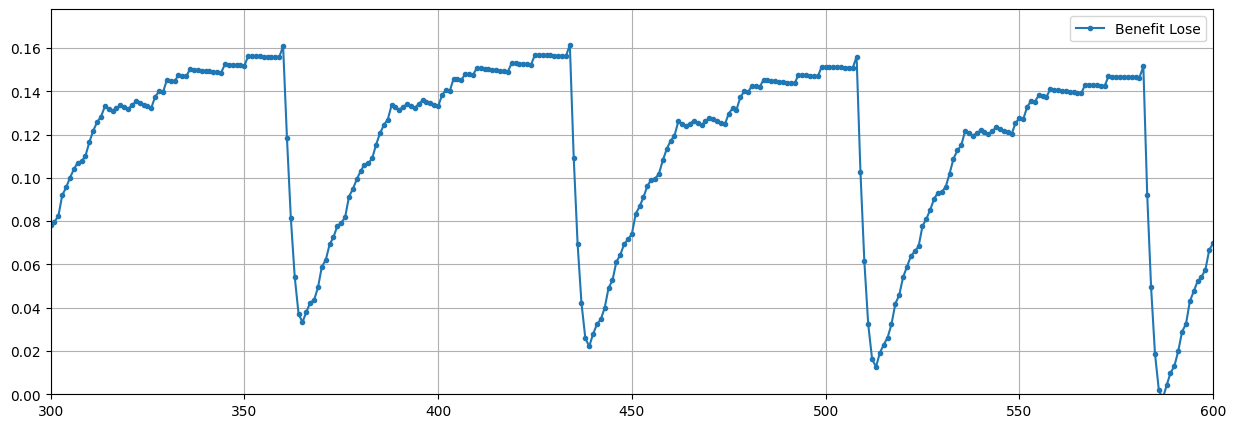

In [57]:
# benefits_win = Finding_Benefits(df = pd.read_csv('data/eth-price-hourly-resolution.csv'))
df = pd.read_csv('data/eth-price-hourly-resolution-win.csv')

benefits_lose = Finding_Benefits(df = df)
df_benefit = pd.DataFrame(data=benefits_lose)
df_benefit.columns=['Benefit Lose']
ax = df_benefit.plot(grid=True,figsize=(15,5),style=['.-'])
ax.set_ylim(bottom=0)
ax.set_xlim(left= 300,right=600)

In [33]:
df_benefit.max()

Benefit Lose    0.160114
dtype: float64

In [35]:
df.iloc[368]

win percent       0.6
lose percent     -0.8
wins            378.0
loses           207.0
nothing         819.0
Name: 368, dtype: float64